## **Introduction**

This project aims to predict in-hospital mortality for ICU patients using a combination of advanced machine learning models, specifically a neural network and XGBoost. The dataset consists of various physiological metrics and patient characteristics, such as vital signs and lab values. Early identification of patients at risk of mortality in the ICU is crucial for timely intervention, which can improve healthcare outcomes and reduce mortality rates.

## **Rationale**

ICU mortality prediction is a vital task in critical care medicine. By leveraging machine learning, particularly neural networks and XGBoost, we aim to create a robust model that assists healthcare professionals in identifying high-risk patients early. This predictive capability can lead to timely interventions, potentially reducing ICU mortality rates.

## **Strategies Used**

1. **Data Exploration and Visualization**  
   - A comprehensive overview of the dataset, including missing value analysis, is performed to identify any gaps or issues that could affect the model's performance.  
   - Visualizations of mortality distribution and the target class (`In-hospital_death`) reveal a significant class imbalance, which is a common challenge in healthcare datasets.

2. **Data Cleaning**  
   - Missing values, particularly in critical physiological data, are handled carefully to ensure the integrity of the dataset. This is especially important in healthcare datasets where missing values could be due to sensor failures or skipped measurements.

3. **Feature Engineering**  
   - Key features are created or transformed from physiological parameters, lab results, and demographic information to improve model performance. This includes normalizing continuous variables and creating new features based on domain knowledge.

4. **Model Selection**  
   - A neural network model was initially chosen for its ability to model non-linear relationships and capture complex patterns in high-dimensional data. Additionally, XGBoost is introduced to leverage the power of ensemble learning. Both models are optimized using cross-validation and hyperparameter tuning.

5. **Ensemble Learning**  
   - **XGBoost**, an advanced implementation of gradient boosting, is employed alongside the neural network model to capitalize on the strengths of both approaches. This ensemble strategy can improve the overall predictive performance of the model.

## **Tools or Technologies Used**

1. **Python Libraries**  
   - `pandas` and `numpy` for data manipulation and preprocessing.  
   - `matplotlib` and `seaborn` for data visualization.  
   - `scikit-learn` for train-test split, scaling, and evaluation metrics.  
   - `xgboost` for implementing the XGBoost classifier.  
   - `TensorFlow` or `PyTorch` for building the deep learning model.

2. **Data Processing**  
   - Missing values are handled using appropriate techniques, and continuous variables are standardized.  
   - Class imbalance is addressed using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or oversampling to ensure better performance on the minority class.

## **Concepts or Algorithms Used**

1. **Neural Network**  
   - A deep feed-forward neural network is used for binary classification, predicting the probability of patient mortality (`In-hospital_death`). The model architecture consists of multiple layers with activation functions like ReLU to introduce non-linearity.

2. **XGBoost (Extreme Gradient Boosting)**  
   - XGBoost is an ensemble learning method that uses gradient boosting to combine multiple weak learners (decision trees) into a strong predictive model. It is known for its speed and accuracy, especially in structured/tabular data, and performs well on imbalanced datasets.

3. **Binary Classification**  
   - The task is framed as a binary classification problem, where the model predicts whether a patient will survive or die based on various medical parameters.

4. **Evaluation Metrics**  
   - The models are evaluated using accuracy, precision, recall, F1-score, and **AUC-ROC** (Area Under the Receiver Operating Characteristic Curve). These metrics are crucial for assessing the model's ability to identify high-risk patients accurately while minimizing false positives.

## **Why These Techniques?**

1. **Neural Networks**  
   - Neural networks excel at modeling complex, non-linear relationships in medical data, making them suitable for predicting ICU mortality, where interactions between various patient metrics may not be immediately obvious.

2. **XGBoost**  
   - XGBoost is added to complement the neural network. It can handle non-linear relationships, is highly interpretable through feature importance, and often performs better on imbalanced datasets, making it a valuable tool in mortality prediction tasks.

3. **Handling Class Imbalance**  
   - The project tackles class imbalance through resampling techniques (such as SMOTE and oversampling) to ensure that the model does not favor the majority class (survivors), which is crucial for accurate predictions of rare outcomes like mortality.

4. **Exploratory Data Analysis (EDA)**  
   - Comprehensive EDA is critical for understanding the data distribution, missingness, and class imbalance, ensuring that the dataset is appropriately prepared for modeling.

## **Model Comparison**

1. **Performance Metrics**:  
   Both the neural network and XGBoost models are evaluated using accuracy, precision, recall, F1-score, and AUC-ROC. This helps compare their performance and identify which model is better suited for predicting ICU mortality.

2. **Interpretability**:  
   While neural networks are powerful at capturing complex patterns, XGBoost provides better interpretability through feature importance rankings, giving healthcare professionals insight into the key factors influencing ICU mortality predictions.

3. **Ensemble Approach**:  
   The predictions from both models can be combined using techniques like voting or stacking to potentially enhance the overall predictive accuracy and robustness.

By combining both XGBoost and a neural network, the project leverages the strengths of both models, creating a more robust and versatile approach to ICU mortality prediction. This dual-model strategy can potentially improve model performance, providing actionable insights for healthcare providers to intervene in a timely manner.

In [39]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf


# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [40]:
# Check the versions of the libraries for reproducibility
print(f'NumPy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'TensorFlow version: {tf.__version__}')

NumPy version: 1.26.4
Pandas version: 2.2.2
TensorFlow version: 2.17.1


# Loading the dataset

In [41]:
train=pd.read_csv('/content/icu_mortality_train (2).csv')
train.head()

,RecordID,Age,Gender,Height,Weight,Urine,HR,Temp,NIDiasABP,SysABP,...,PaCO2,PaO2,Platelets,MAP,K,Na,FiO2,GCS,ICUType,In-hospital_death
0,137021.0,66.0,1.0,177.8,102.00,117.50,113.41,37.23,56.61,NaN,...,NaN,NaN,209.00,NaN,4.25,137.00,NaN,15.00,2.0,0
1,133611.0,50.0,1.0,NaN,92.40,210.51,85.93,38.04,58.60,126.69,...,41.00,175.00,243.33,88.02,4.38,144.00,0.51,6.88,4.0,0
2,137860.0,40.0,1.0,185.4,81.80,467.41,98.83,36.83,57.88,157.63,...,38.82,127.12,143.33,108.53,4.33,139.67,0.55,7.65,4.0,0
3,134781.0,58.0,1.0,180.3,99.22,86.55,81.63,36.96,49.64,113.86,...,46.20,147.60,109.60,78.06,4.07,137.75,0.58,13.50,2.0,0
4,133534.0,80.0,1.0,NaN,73.00,194.12,71.86,37.10,72.85,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.00,3.0,0


In [42]:
train.shape

(4000, 22)

# Missing Values Plot

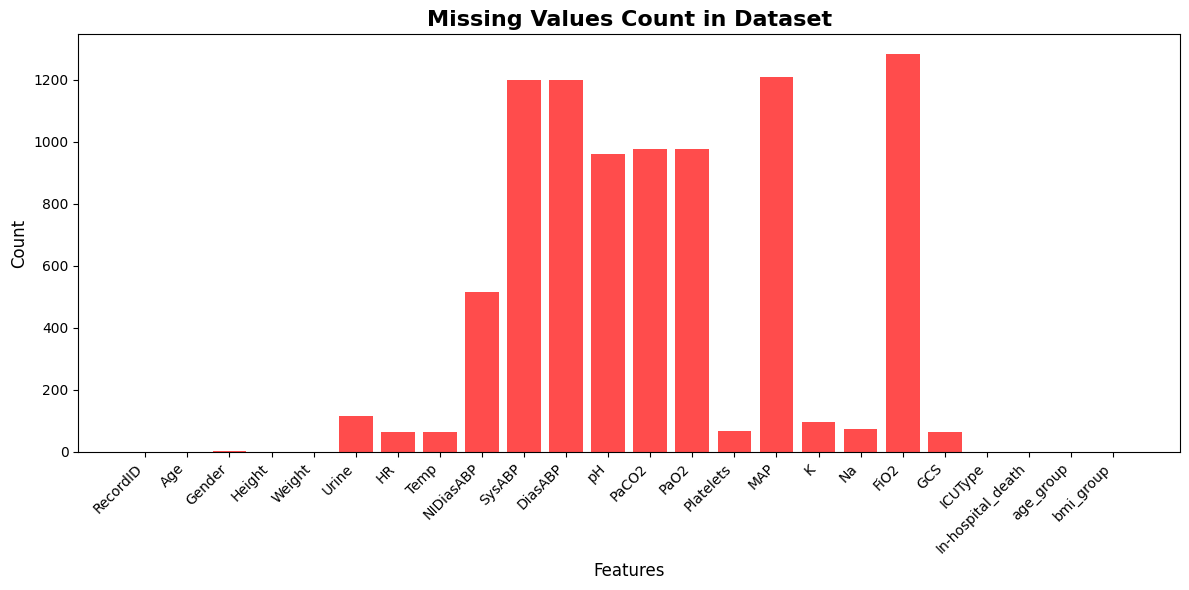

In [80]:
# Import required libraries
import matplotlib.pyplot as plt

# Calculate missing values
missing = train.isna().sum().reset_index()
missing.columns = ['features', 'total_missing']
missing['percent'] = (missing['total_missing'] / len(train)) * 100

# Plot missing values using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(missing['features'], missing['total_missing'], color='red', alpha=0.7)
plt.title('Missing Values Count in Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [44]:
train['In-hospital_death'].value_counts()

,count
In-hospital_death,
0,3446
1,554


# Mortality Distribution

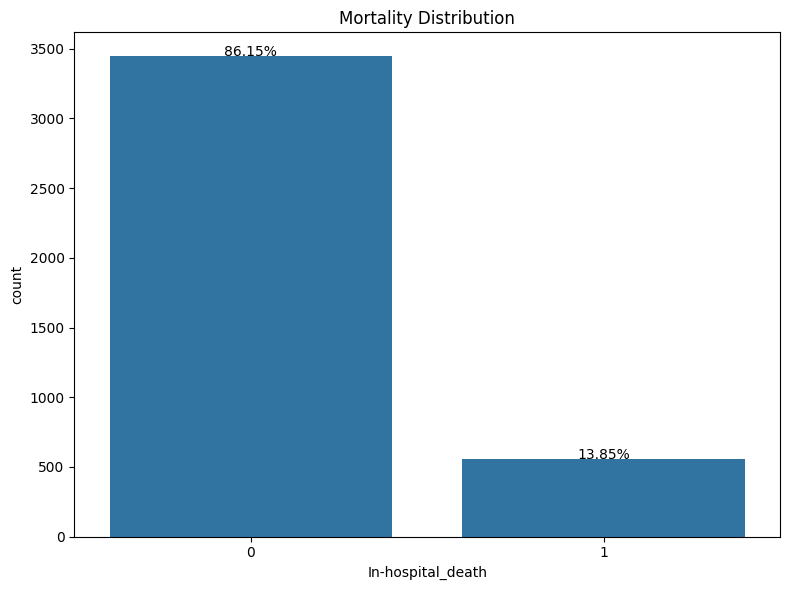

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Plot Mortality Distribution
sns.countplot(x='In-hospital_death', data=train)
plt.title('Mortality Distribution')
ax = plt.gca()  # Get current axis for annotation
for p in ax.patches:
    height = p.get_height()
    percentage = round(100 * height / len(train), 2)
    ax.text(p.get_x() + p.get_width() / 2.0, height + 3, f"{percentage}%", ha='center')

plt.tight_layout()
plt.show()


# Mortality Distribution by Gender

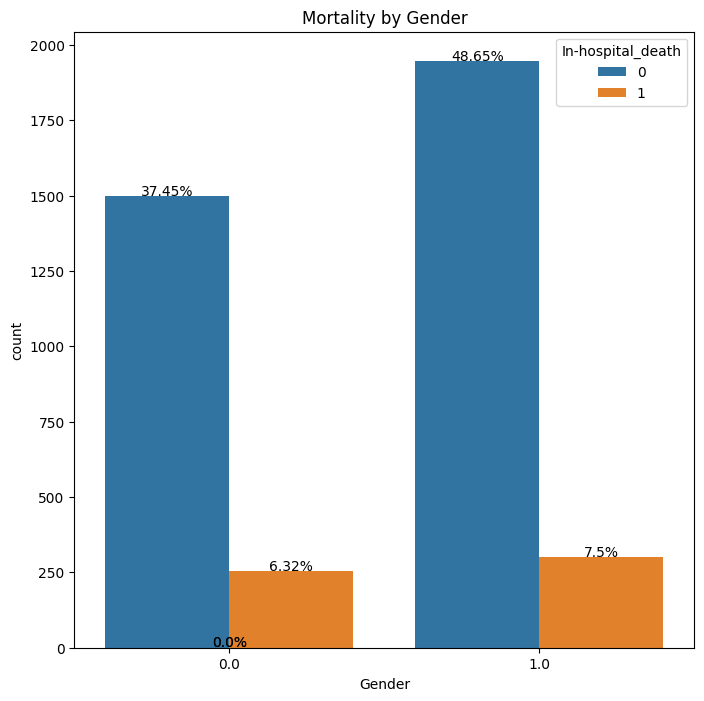

In [46]:
plt.figure(figsize = (8, 8))
plt.title('Mortality by Gender')
ax = sns.countplot(x = 'Gender', data = train, hue = 'In-hospital_death')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(train), 2)}%",
                ha = 'center')

* **Mortality is almost same in both male and female**

# Mortality Distribution by ICU TYPE

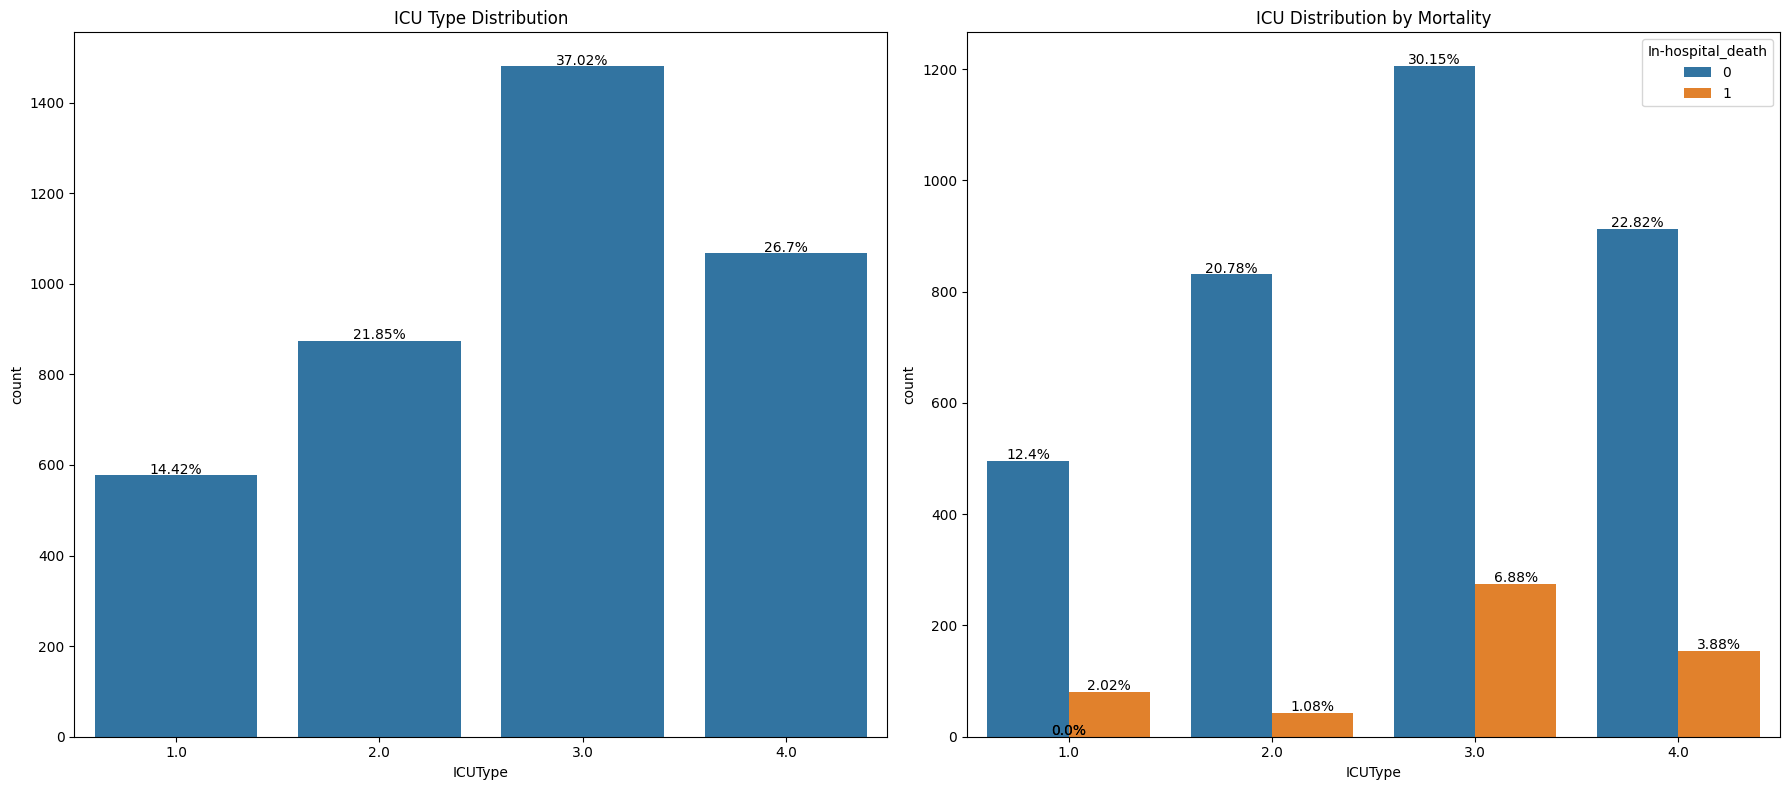

In [47]:
plt.figure(figsize=(18, 8))

# ICU Type Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='ICUType', data=train)
plt.title('ICU Type Distribution')
ax1 = plt.gca()  # Get current axis for annotation
for p in ax1.patches:
    height = p.get_height()
    percentage = round(100 * height / len(train), 2)
    ax1.text(p.get_x() + p.get_width() / 2.0, height + 3, f"{percentage}%", ha='center')

# ICU Distribution by Mortality
plt.subplot(1, 2, 2)
sns.countplot(x='ICUType', data=train, hue='In-hospital_death')
plt.title('ICU Distribution by Mortality')
ax2 = plt.gca()  # Get current axis for annotation
for p in ax2.patches:
    height = p.get_height()
    percentage = round(100 * height / len(train), 2)
    ax2.text(p.get_x() + p.get_width() / 2.0, height + 3, f"{percentage}%", ha='center')

plt.tight_layout()
plt.show()


* **Mortality is higher in ICU Type 3.0 and 4.0.**

# Patient's Age Histogram

<Axes: title={'center': "Histogram Distribution of Patient's Age"}, xlabel='Age', ylabel='Count'>

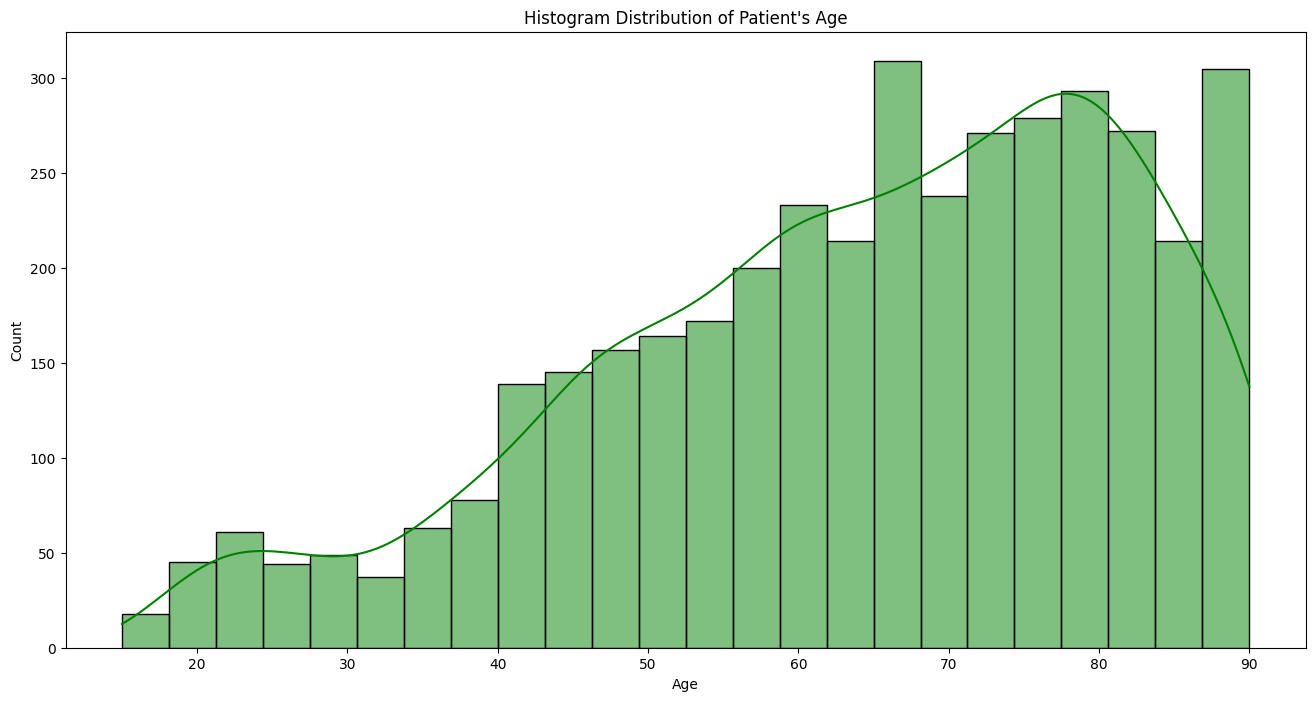

In [48]:
plt.figure(figsize=(16,8))
plt.title("Histogram Distribution of Patient's Age")
sns.histplot(train['Age'],color='green',kde=True)

* **Most of the ICU patients are higher in Age**

# **Mortality by Age Group**

In [49]:
round(410/4000,2)

0.1

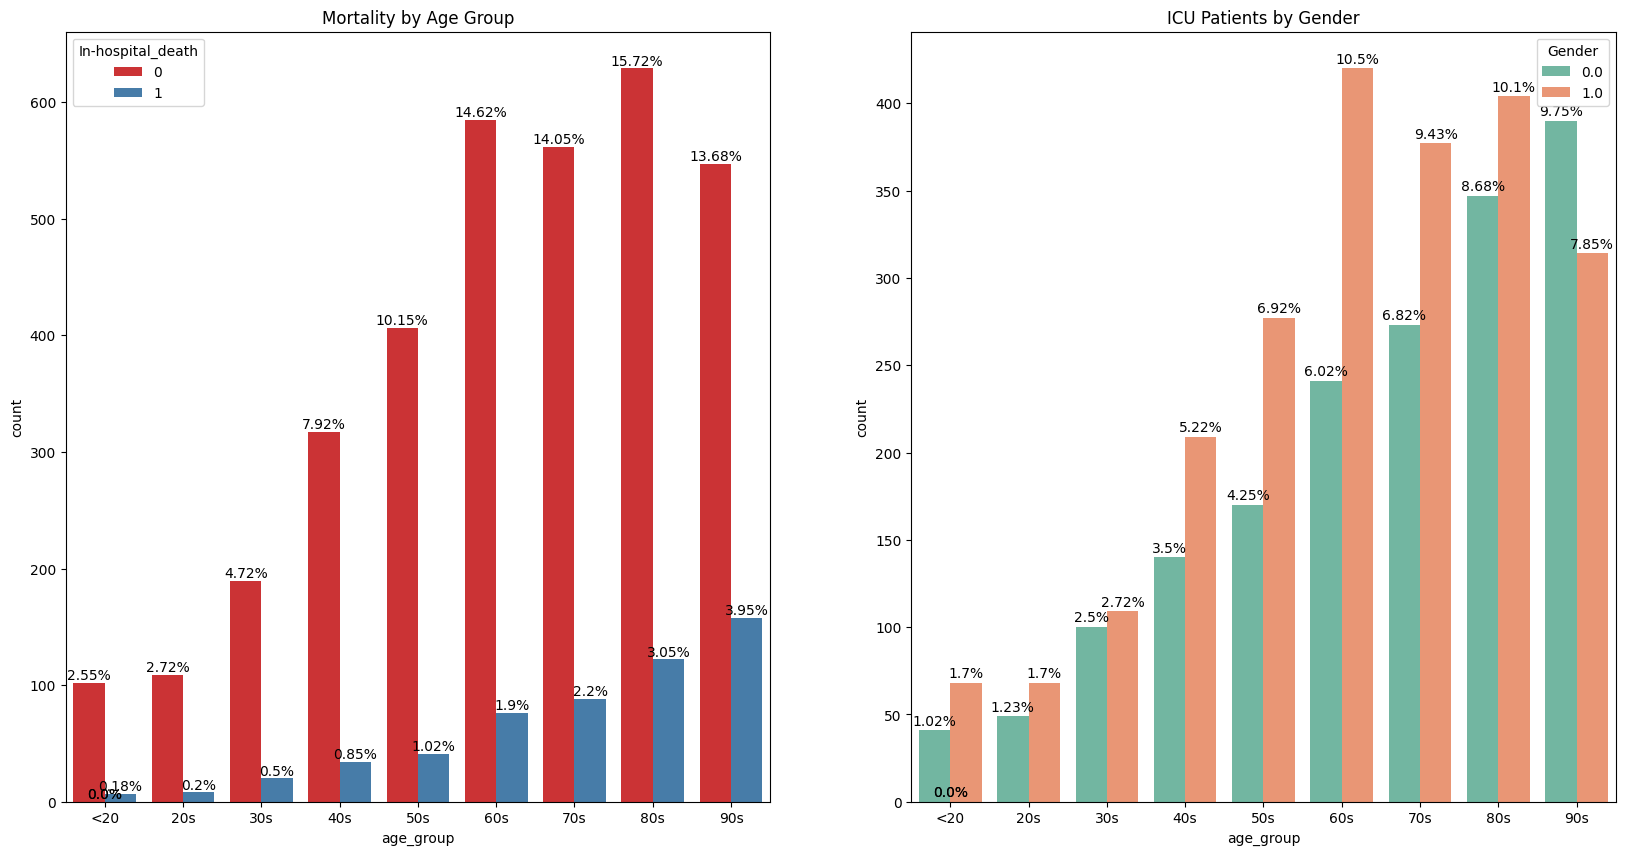

In [50]:
train['age_group']=pd.cut(train['Age'],bins=9,labels=['<20','20s','30s','40s','50s','60s','70s','80s','90s'])

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Mortality by Age Group')
ax=sns.countplot(x='age_group',data=train,hue='In-hospital_death',palette='Set1')
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.0,height+3,f"{round(100*height/len(train),2)}%",ha='center')

plt.subplot(1,2,2)
plt.title('ICU Patients by Gender')
ax=sns.countplot(x='age_group',data=train,hue='Gender',palette='Set2')
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+ p.get_width()/2.0,height+3,f"{round(100 * height/len(train),2)}%",ha='center')

* **Mortality is more for patients in higher age group.**
* **More male patients are in ICU than Female patient.**

# Height and Weight data distribution along with mean/median

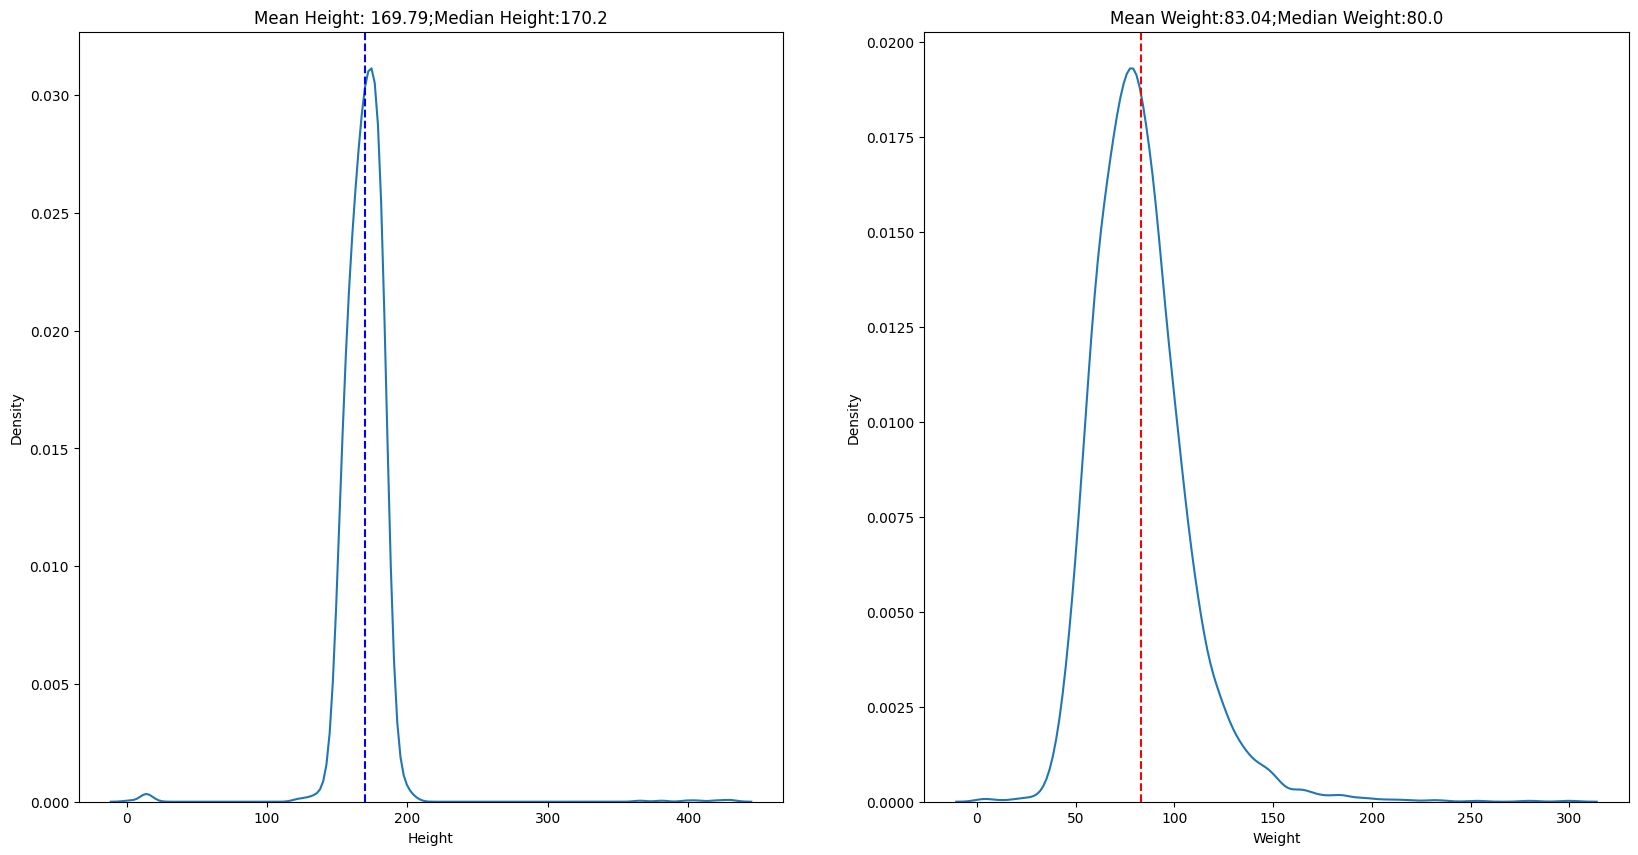

In [51]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title(f"Mean Height: {round(train['Height'].mean(),2)};Median Height:{train['Height'].median()}")
ax=sns.kdeplot(x='Height',data=train)
ax.axvline(train['Height'].mean(),ls='--',color='b')

plt.subplot(1,2,2)
plt.title(f"Mean Weight:{round(train['Weight'].mean(),2)};Median Weight:{train['Weight'].median()}")
ax=sns.kdeplot(x='Weight',data=train)
ax.axvline(train['Weight'].mean(),ls='--',color='r')

# Calculating the BMI Index

* Now we calculate the Body Mass Index (BMI) of patients to check how it affects their mortality
* To calculate the BMI of patients in ICU we need impute NaNs in Height and Weight features
* We impute using their Median value
* The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared
* Height in our dataset is in cm (centimeters) so the formula is weight (kg) / [height (cm)]^2 x 10,000

In [52]:
#using median because the data is skewed and it is more resistant to outliers than mean
train['Height']=train['Height'].fillna(train['Height'].median())
train['Weight']=train['Weight'].fillna(train['Weight'].median())
train['bmi']=train.apply(lambda x:round((x['Weight']/(x['Height']**2))*10000,2),axis=1)
train['bmi_group']=pd.cut(train['bmi'],bins=[train['bmi'].min(),18.5,24.9,29.9,train['bmi'].max()],
                         labels=['Underweight','Healthy','Overweight','Obesity'])
del train['bmi']


In [53]:
train.head()

,RecordID,Age,Gender,Height,Weight,Urine,HR,Temp,NIDiasABP,SysABP,...,Platelets,MAP,K,Na,FiO2,GCS,ICUType,In-hospital_death,age_group,bmi_group
0,137021.0,66.0,1.0,177.8,102.00,117.50,113.41,37.23,56.61,NaN,...,209.00,NaN,4.25,137.00,NaN,15.00,2.0,0,70s,Obesity
1,133611.0,50.0,1.0,170.2,92.40,210.51,85.93,38.04,58.60,126.69,...,243.33,88.02,4.38,144.00,0.51,6.88,4.0,0,50s,Obesity
2,137860.0,40.0,1.0,185.4,81.80,467.41,98.83,36.83,57.88,157.63,...,143.33,108.53,4.33,139.67,0.55,7.65,4.0,0,30s,Healthy
3,134781.0,58.0,1.0,180.3,99.22,86.55,81.63,36.96,49.64,113.86,...,109.60,78.06,4.07,137.75,0.58,13.50,2.0,0,60s,Obesity
4,133534.0,80.0,1.0,170.2,73.00,194.12,71.86,37.10,72.85,NaN,...,NaN,NaN,NaN,NaN,NaN,15.00,3.0,0,80s,Overweight


# BMI Distribution by Mortality and Gender

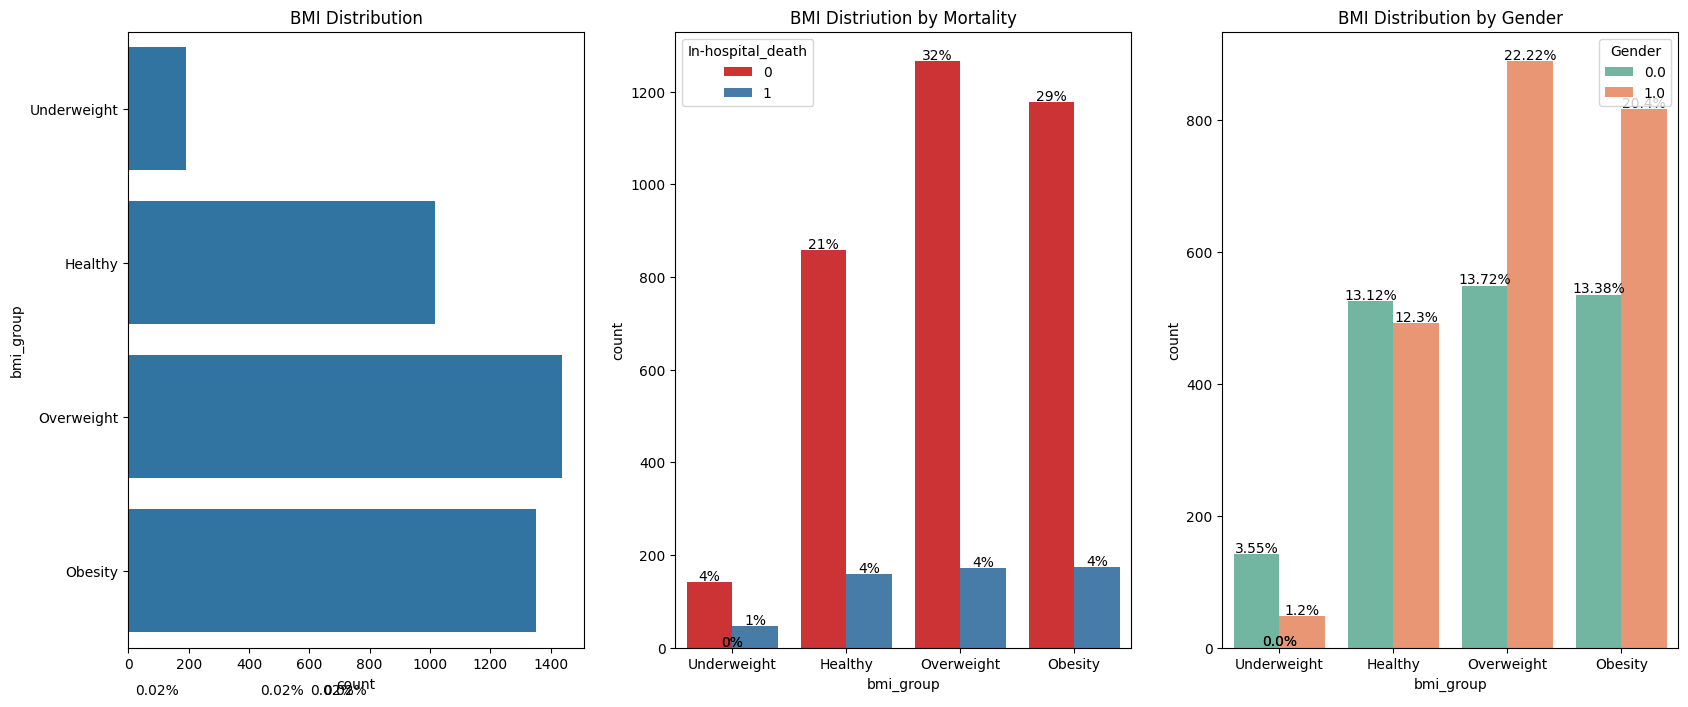

In [54]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title('BMI Distribution')
ax=sns.countplot(train['bmi_group'])
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.0,height+3,f"{round(100*height/len(train),2)}%",ha='center')

plt.subplot(1,3,2)
plt.title('BMI Distriution by Mortality')
ax=sns.countplot(x='bmi_group',data=train,hue='In-hospital_death',palette='Set1')
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,f"{round(100*height/len(train))}%",ha='center')

plt.subplot(1,3,3)
plt.title("BMI Distribution by Gender")
ax=sns.countplot(x='bmi_group',data=train,hue='Gender',palette='Set2')
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,f"{round(100*height/len(train),2)}%",ha="center")





* Around 70% patients admitted are in bmi index Overweight and Obese.
* Mortality is higher in the same bmi index group.
* More male patients than female in higher bmi index.

In [55]:
train.columns

Index(['RecordID', 'Age', 'Gender', 'Height', 'Weight', 'Urine', 'HR', 'Temp',
       'NIDiasABP', 'SysABP', 'DiasABP', 'pH', 'PaCO2', 'PaO2', 'Platelets',
       'MAP', 'K', 'Na', 'FiO2', 'GCS', 'ICUType', 'In-hospital_death',
       'age_group', 'bmi_group'],
      dtype='object')

In [56]:
train['In-hospital_death'].value_counts()

,count
In-hospital_death,
0,3446
1,554


# Histogram Distribution of Urine Parameter

Text(0.7, 0.95, 'Mean:139.87')

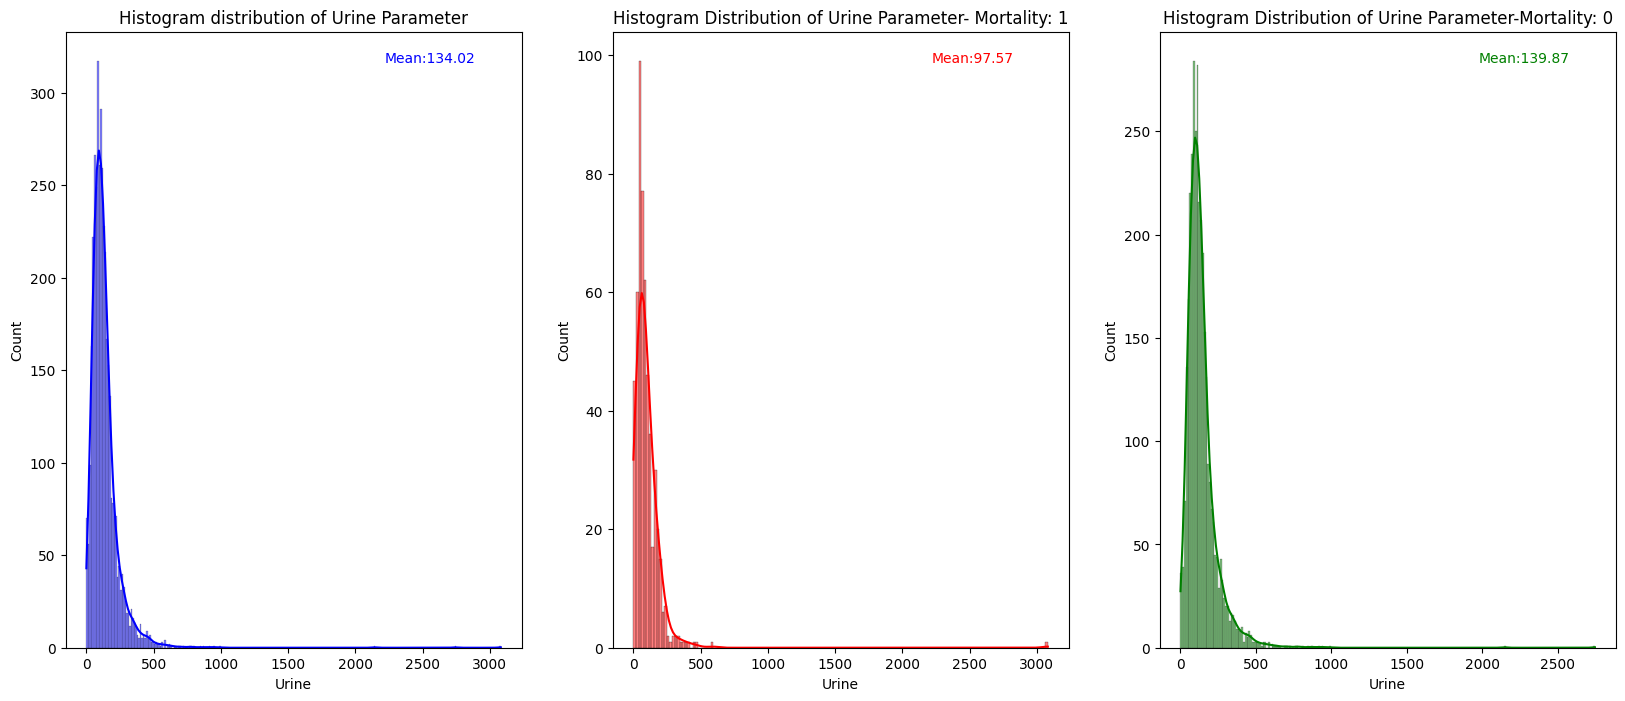

In [57]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title('Histogram distribution of Urine Parameter')
sns.histplot(train['Urine'],color='blue',kde=True)
plt.annotate(f"Mean:{round(train['Urine'].mean(),2)}",xy=(0.7,0.95),xycoords='axes fraction',color='blue')

plt.subplot(1,3,2)
plt.title('Histogram Distribution of Urine Parameter- Mortality: 1')
sns.histplot(train[train['In-hospital_death']==1]['Urine'],color='red',kde=True)
plt.annotate(f"Mean:{round(train[train['In-hospital_death']==1]['Urine'].mean(),2)}",xy=(0.7,0.95),xycoords='axes fraction',color='red')

plt.subplot(1,3,3)
plt.title('Histogram Distribution of Urine Parameter-Mortality: 0')
sns.histplot(train[train['In-hospital_death']==0]['Urine'],color='green',kde=True)
plt.annotate(f"Mean:{round(train[train['In-hospital_death']==0]['Urine'].mean(),2)}",xy=(0.7,0.95),xycoords='axes fraction',color='green')

# Categorical Features and Numerical Features

In [58]:
cat_features=['Gender','ICUType','age_group','bmi_group']
num_features=[c for c in train.columns if c not in cat_features]
num_features=[c for c in num_features if c not in ['RecordID','In-hospital_death']]
cat_features,num_features

(['Gender', 'ICUType', 'age_group', 'bmi_group'],
 ['Age',
  'Height',
  'Weight',
  'Urine',
  'HR',
  'Temp',
  'NIDiasABP',
  'SysABP',
  'DiasABP',
  'pH',
  'PaCO2',
  'PaO2',
  'Platelets',
  'MAP',
  'K',
  'Na',
  'FiO2',
  'GCS'])

In [59]:
print(len(num_features))


18


# Boxplot to visualize data distribution in terms of 5 point summery and outliers**

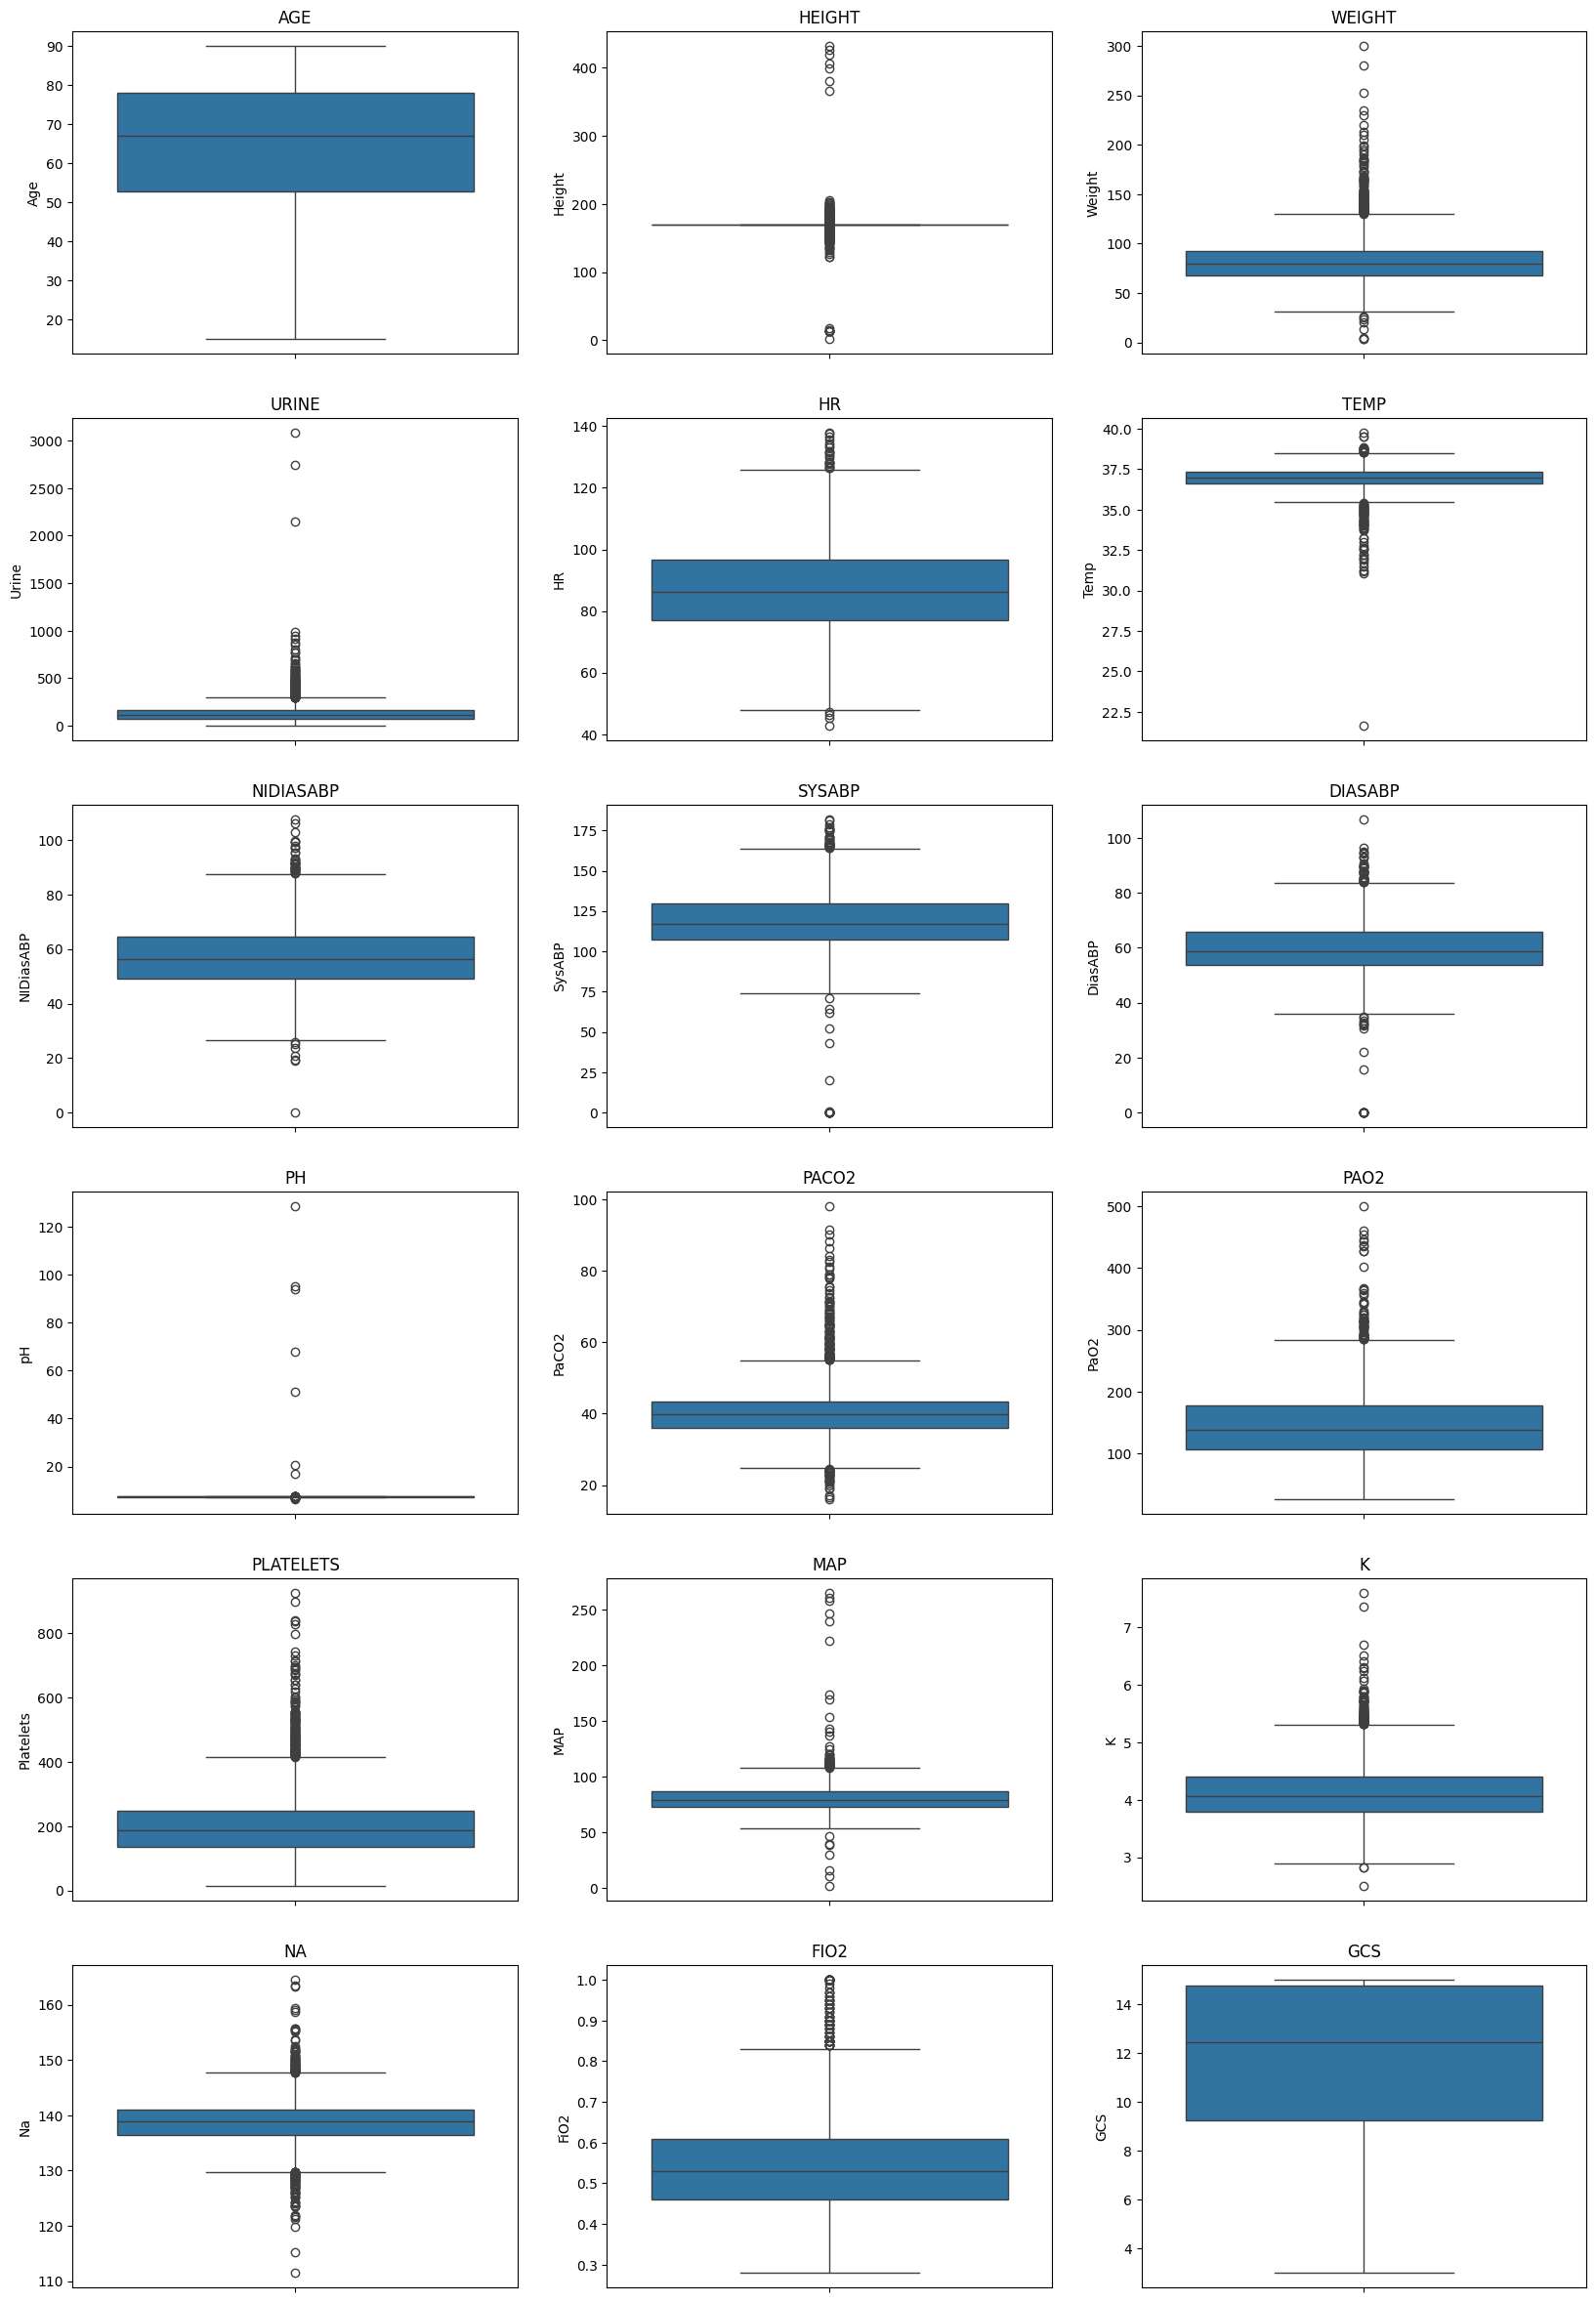

In [60]:
plt.figure(figsize=(20,30))
for i,col in enumerate(train[num_features]):
    plt.subplot(6,int(len(num_features)/6), i+1)
    sns.boxplot(y=col,data=train)
    plt.title(col.upper())

Most of the features have outliers

In [61]:
train.isnull().sum()

,0
RecordID,0
Age,0
Gender,3
Height,0
Weight,0
Urine,117
HR,63
Temp,64
NIDiasABP,517
SysABP,1201


# Imputing NaN Values

We can impute all the NaN Values with the respective feature's mean value.
But here we impute NaNs depending on the 'In-hospital_death' value.

In [62]:
df_0=train[train['In-hospital_death']==0].copy()
df_1=train[train['In-hospital_death']==1].copy()

#Impute numerical features with mean values
df_0[num_features]=df_0[num_features].fillna(df_0[num_features].mean())
df_1[num_features]=df_1[num_features].fillna(df_1[num_features].mean())

#impute categorical features with mean values
df_0[cat_features]=df_0[cat_features].fillna(df_0[cat_features].mode())
df_1[cat_features]=df_1[cat_features].fillna(df_1[cat_features].mode())


In [63]:
#concat both the dataframes, suffle and reset index

df=pd.concat([df_0,df_1],axis=0).sample(frac=1).reset_index(drop=True)
df.head()

,RecordID,Age,Gender,Height,Weight,Urine,HR,Temp,NIDiasABP,SysABP,...,Platelets,MAP,K,Na,FiO2,GCS,ICUType,In-hospital_death,age_group,bmi_group
0,134824.0,60.0,1.0,170.2,81.10,47.730000,107.81,36.85,81.79,119.056707,...,137.330000,81.216815,5.320000,143.000000,1.000000,14.92,4.0,0,60s,Overweight
1,141424.0,64.0,0.0,170.2,74.30,97.571769,63.24,36.96,44.44,109.850000,...,315.120000,74.940000,5.420000,140.000000,0.400000,9.92,3.0,1,60s,Overweight
2,132946.0,29.0,1.0,170.2,76.40,268.810000,87.12,36.90,57.40,155.760000,...,156.000000,104.790000,3.750000,137.250000,0.420000,8.14,4.0,0,20s,Overweight
3,141275.0,81.0,0.0,149.9,59.96,172.580000,103.58,35.65,62.00,122.580000,...,435.600000,87.040000,4.260000,137.750000,0.562455,15.00,1.0,1,80s,Overweight
4,134915.0,20.0,1.0,170.2,80.00,292.220000,107.89,37.48,56.40,119.056707,...,206.196242,81.216815,4.130593,138.822431,0.546648,15.00,4.0,0,<20,Overweight


In [64]:
df.shape

(4000, 24)

In [65]:
print('Feature Correlation with Target:')
df.corr(numeric_only=True)['In-hospital_death']

Feature Correlation with Target:


,In-hospital_death
RecordID,-0.011532
Age,0.130700
Gender,-0.015689
Height,-0.013628
Weight,-0.054590
Urine,-0.124613
HR,0.073804
Temp,-0.060020
NIDiasABP,-0.092156
SysABP,-0.066522


# Label Encoding and Standard Scaling

In [66]:
from sklearn.preprocessing import LabelEncoder
for col in ['Gender','ICUType','age_group','bmi_group']:
    print(f"Label Encoding: {col} -{df[col].nunique()}")
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

Label Encoding: Gender -2
Label Encoding: ICUType -4
Label Encoding: age_group -9
Label Encoding: bmi_group -4


In [67]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df[num_features]=std.fit_transform(df[num_features])

In [68]:
df.head()

,RecordID,Age,Gender,Height,Weight,Urine,HR,Temp,NIDiasABP,SysABP,...,Platelets,MAP,K,Na,FiO2,GCS,ICUType,In-hospital_death,age_group,bmi_group
0,134824.0,-0.241902,1,0.014848,-0.074272,-0.735908,1.425653,-0.146135,2.236666,0.026672,...,-0.664012,0.013230,2.431977,1.021984,4.335715,1.025753,3,0,4,2
1,141424.0,-0.014096,0,0.014848,-0.368277,-0.310789,-1.650909,0.005115,-1.182227,-0.529991,...,1.072213,-0.525784,2.637202,0.281626,-1.430335,-0.522107,2,1,4,2
2,132946.0,-2.007404,1,0.014848,-0.277482,1.149765,-0.002529,-0.077385,0.004087,2.245857,...,-0.481689,2.037549,-0.790046,-0.397036,-1.238134,-1.073145,3,0,0,2
3,141275.0,0.954083,0,-1.372074,-0.988282,0.328984,1.133666,-1.796136,0.425156,0.239701,...,2.248771,0.513289,0.256598,-0.273643,0.130870,1.050518,0,1,6,2
4,134915.0,-2.519969,1,0.014848,-0.121832,1.349437,1.431175,0.720115,-0.087449,0.026672,...,0.008507,0.013230,-0.008977,-0.008982,-0.021040,1.050518,3,0,8,2


In [69]:
X=df.drop(['RecordID','In-hospital_death'],axis=1)
y=df['In-hospital_death'].copy()

**# Train, Test Split**

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [71]:
X_train.shape

(3200, 22)

In [72]:
X_test.shape

(800, 22)

# **# Building the model using ANN**

In [81]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(20, input_shape=(X_train.shape[1],), activation='relu'),
        keras.layers.Dense(40, activation='relu'),
        keras.layers.Dense(80, activation='relu'),
        keras.layers.Dense(40, activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:  # No class weights
        model.fit(X_train, y_train, epochs=100, verbose=1)
    else:  # Apply class weights
        model.fit(X_train, y_train, epochs=100, verbose=1, class_weight=weights)

    print("\nEvaluating the model on test data:")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)

    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

    return y_pred

# **Handle Imbalanced Dataset - Oversampling**

In [82]:
# Calculate class counts
inhospitaldeath_0, inhospitaldeath_1 = df['In-hospital_death'].value_counts()
print(f"Class 0 Count: {inhospitaldeath_0}, Class 1 Count: {inhospitaldeath_1}")

# Separate the classes
df_0 = df[df['In-hospital_death'] == 0]
df_1 = df[df['In-hospital_death'] == 1]

# Apply oversampling to balance the dataset
df_1_over = df_1.sample(n=inhospitaldeath_0, replace=True, random_state=42)
df_oversamp = pd.concat([df_0, df_1_over], axis=0)

# Verify the class distribution
print("Balanced Class Distribution (Oversampling):")
print(df_oversamp['In-hospital_death'].value_counts())

# Prepare the features and labels for oversampling
X_over = df_oversamp.drop(['RecordID', 'In-hospital_death'], axis=1)
y_over = df_oversamp['In-hospital_death']

Class 0 Count: 3446, Class 1 Count: 554
Balanced Class Distribution (Oversampling):
In-hospital_death
0    3446
1    3446
Name: count, dtype: int64


# **Apply SMOTE for Balancing**

In [83]:
# Prepare features and labels for SMOTE
X = df.drop(['RecordID', 'In-hospital_death'], axis=1)
y = df['In-hospital_death']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# **Split the Datasets**

In [84]:
# Split the oversampled dataset into train and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over, y_over, test_size=0.2, random_state=15, stratify=y_over
)

# Split the SMOTE dataset into train and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=15, stratify=y_smote
)

# Check dataset dimensions
print(f"X_train Shape (Oversampling): {X_train_over.shape}, X_test Shape: {X_test_over.shape}")
print(f"X_train Shape (SMOTE): {X_train_smote.shape}, X_test Shape: {X_test_smote.shape}")

X_train Shape (Oversampling): (5513, 22), X_test Shape: (1379, 22)
X_train Shape (SMOTE): (5513, 22), X_test Shape: (1379, 22)


# **Train the Model on Oversampled Dataset**

In [85]:
print("\nTraining with Oversampled Dataset:")
y_preds_over = ANN(X_train_over, y_train_over, X_test_over, y_test_over, 'binary_crossentropy', -1)


Training with Oversampled Dataset:
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6193 - loss: 0.6501
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7497 - loss: 0.5123
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7780 - loss: 0.4612
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4271
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.3971
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8332 - loss: 0.3706
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8511 - loss: 0.3521
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8610 - loss: 0.3305
Epoch 9/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8611 - loss: 0.3150
Epoch 10/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8798 - loss: 0.2980
Epoch 11/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8882 - loss: 0.2802
Epoch 12/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

# **Train the Model on SMOTE Dataset**

In [86]:
print("\nTraining with SMOTE Dataset:")
y_preds_smote = ANN(X_train_smote, y_train_smote, X_test_smote, y_test_smote, 'binary_crossentropy', -1)


Training with SMOTE Dataset:
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6310 - loss: 0.6400
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7485 - loss: 0.5199
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7776 - loss: 0.4750
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7957 - loss: 0.4438
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8130 - loss: 0.4216
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.4019
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8348 - loss: 0.3845
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8428 - loss: 0.3670
Epoch 9/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8570 - loss: 0.3488
Epoch 10/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8677 - loss: 0.3295
Epoch 11/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8742 - loss: 0.3152
Epoch 12/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


XGBoost Classifier Results:
Accuracy: 0.9579405366207396

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       690
           1       0.92      1.00      0.96       689

    accuracy                           0.96      1379
   macro avg       0.96      0.96      0.96      1379
weighted avg       0.96      0.96      0.96      1379



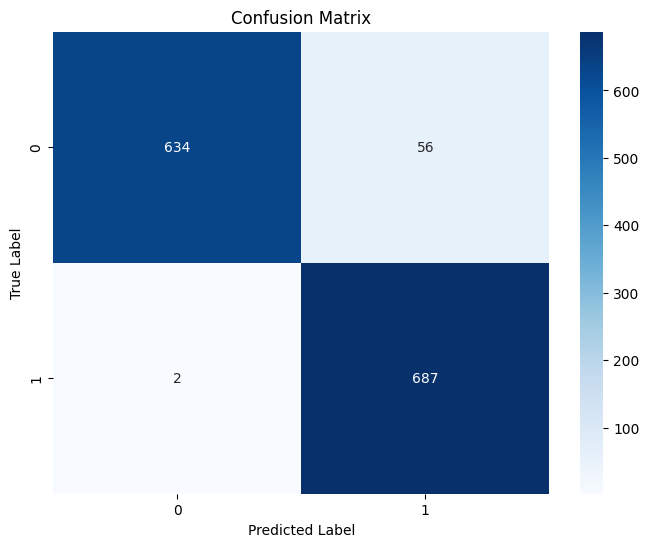


XGBoost Classifier Results:
Accuracy: 0.9274836838288615

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       690
           1       0.90      0.97      0.93       689

    accuracy                           0.93      1379
   macro avg       0.93      0.93      0.93      1379
weighted avg       0.93      0.93      0.93      1379



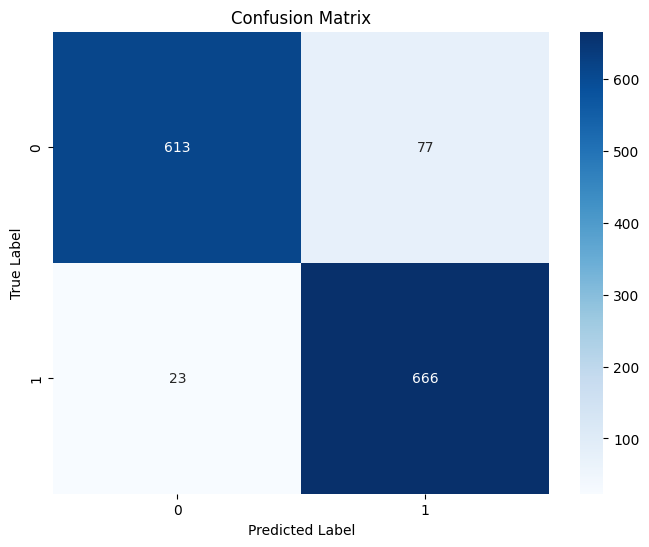

In [89]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def xgboost_classifier(X_train, y_train, X_test, y_test):
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("\nXGBoost Classifier Results:")
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return y_pred

# Execute XGBoost on oversampled data
xgb_pred_over = xgboost_classifier(X_train_over, y_train_over, X_test_over, y_test_over)

# Execute XGBoost on SMOTE data
xgb_pred_smote = xgboost_classifier(X_train_smote, y_train_smote, X_test_smote, y_test_smote)